## Metropolis Monte Carlo
### Lexin Chen 
$V_1(x) = k(x-5)^2$ with $k=1$ and the units of $V_1$ in kcal/mol with x in the range 0 to 10.

Plot $V_1$ vs x, in its own domain

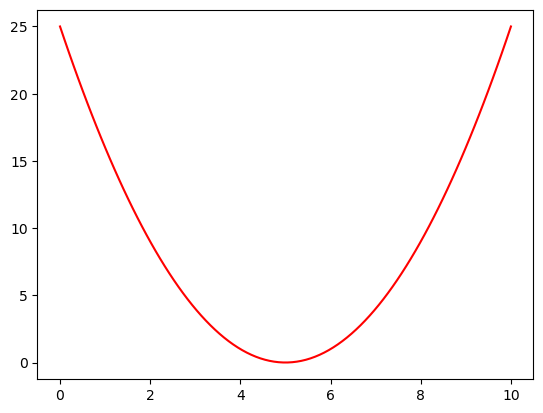

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y=(x - 5) ** 2

plt.plot(x,y,color='red',label='100K')

Compute and plot P(x) for V1 above, assuming a Boltzmann distribution at three temperatures, 100K, 300K and 1000K.

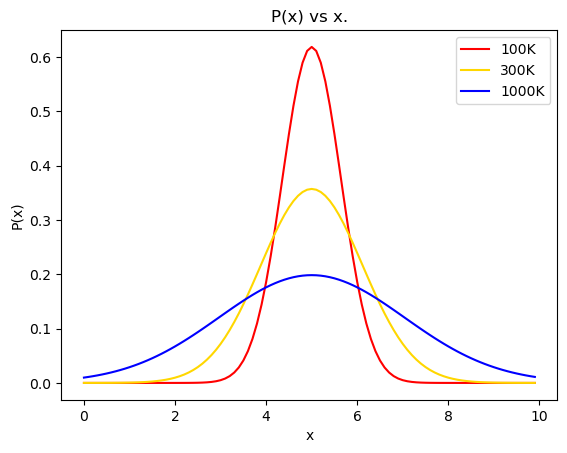

In [50]:
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 

# define variables
t1 = 100 
t2 = 300
t3 = 1000
k = 1
kB = 8.314e-3
list = np.arange(0, 10, .1)

f= lambda x:exp((-k * (x - 5) ** 2) / kB / t1) 
j = scipy.integrate.quad(f, 0, 10)
p1 = []

for i in list:
    num=math.pow(math.e,(-k * (i-5) ** 2)/(kB * t1)) #p(x) = e^(-v(x)/kBT)
    p1.append(num/j[0])

p2=[]
f= lambda x:exp((-k * (x - 5) ** 2) / kB / t2) 
j = scipy.integrate.quad(f, 0, 10)

for i in list:
    num1 = math.pow(math.e,(-k * (i - 5) ** 2)/(kB * t2)) #p(x) = e^(-v(x)/kBT)/integral of same thing
    p2.append(num1 / j[0])

p3 = []
def f(x):
    return exp((-k * (x - 5) ** 2) / kB / t3) 
j = scipy.integrate.quad(f, 0, 10)
for i in list:
    num2 = math.pow(math.e,(-k * (i - 5) ** 2) / (kB * t3)) #p(x) = e^(-v(x)/kBT)
    p3.append(num2 / j[0])

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.plot(list,p1,color='red',label='100K')
plt.plot(list,p2,color='gold',label='300K')
plt.plot(list,p3,color='blue',label='1000K')
plt.legend()

Compute $\langle x \rangle$.

8.08071799439027 / 1.616143598878054
13.996108342541742 / 2.799221668508348
25.190788373100222 / 5.038157674620045


<function matplotlib.pyplot.show(close=None, block=None)>

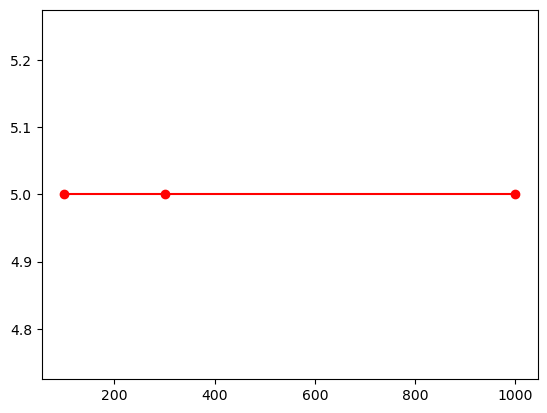

In [51]:
import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
t1 = 100 
t2 = 300
t3 = 1000
k = 1
kB = 8.314e-3
average = []

for n in [t1, t2, t3]:
    def f(x):
        return exp((-k * (x - 5) ** 2) / kB / n)
    g = lambda x: x * exp((-k * (x - 5) ** 2) / kB / n)
    k1 = scipy.integrate.quad(f, 0, 10)
    k2 = scipy.integrate.quad(g, 0, 10)
    print('{} / {}'.format(k2[0], k1[0]))

    average.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show

Compute $\langle x^2 \rangle$.

41.07542086600459 / 1.616143598878054
73.47089788706022 / 2.799221668508348
144.84230289162954 / 5.038157674620045


<function matplotlib.pyplot.show(close=None, block=None)>

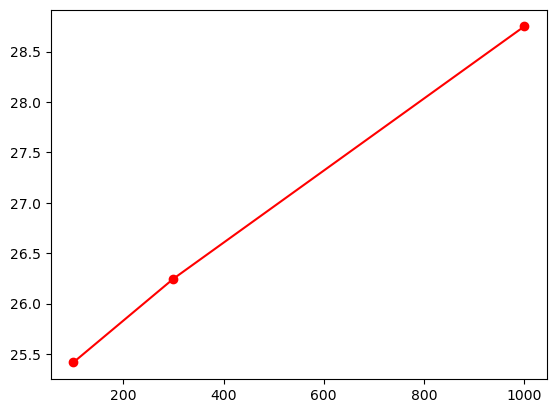

In [52]:
average1 = []
for n in [t1, t2, t3]:
    def f(x):
        return exp((-k * (x - 5) ** 2) / kB / n)
    g = lambda x: x ** 2 * exp((-k ** 2 * (x - 5) ** 2) / kB / n)
    k1 = scipy.integrate.quad(f, 0, 10)
    k2 = scipy.integrate.quad(g, 0, 10)
    print('{} / {}'.format(k2[0], k1[0]))

    average1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

Compute $\langle V_1\rangle$

0.671830894053244 / 1.616143598878054
3.4903561743515232 / 2.799221668508348
18.88836102612844 / 5.038157674620045


<function matplotlib.pyplot.show(close=None, block=None)>

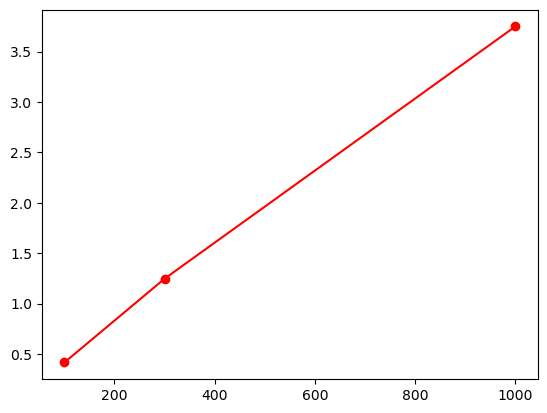

In [44]:
V1 = []
#V1.clear()
for n in [t1, t2, t3]:
    def f(x):
        return exp((-k * (x - 5) ** 2) / kB / n)
    g = lambda x: (x - 5) ** 2 * exp((-k ** 2 * (x - 5) ** 2) / kB / n)
    k1 = scipy.integrate.quad(f, 0, 10)
    k2 = scipy.integrate.quad(g, 0, 10)
    print('{} / {}'.format(k2[0], k1[0]))

    V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show

### Metropolis Monte Carlo python program to sample the Boltzmann distribution for $V_1$
Discard first 10% of accepted moves.

$P(x)$ at 100K

Number of energies: 99000
Number of accept: 21620, Number of rejects: 78380
sequentially: 0.5412433000001329


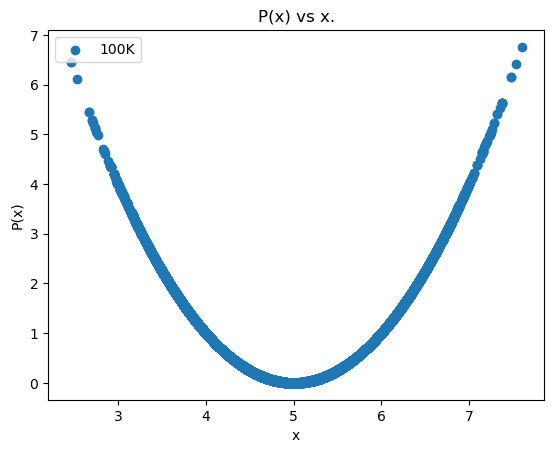

In [53]:
import random
import math
import matplotlib.pyplot as plt
from timeit import default_timer as timer
kB = 8.314e-3 # R constant
T = 100 # Temp
k = 1
start = timer()

def V1(x):
    "Define equation for the Boltzmann distribution"
    return (x - 5) ** 2 

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list =[] # creating a list for all the steps partook
eng_list = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0

# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins
  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list.append(new_energy) 
    steps_list.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list.append(old_energy)
    steps_list.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list = steps_list[1000:] # remove of first 10% of steps
eng_list = eng_list[1000:] # remove of first 10% of energies
print(f"Number of energies: {len(eng_list)}") # proof that first 10% of the numbers were discarded
print(f"Number of accept: {naccept}, Number of rejects: {nreject}")

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list,eng_list,label='100K')

plt.legend()
end = timer()
print(f'sequentially: {end - start}')


Probability Density at 100K

C:\Users\le.chen\AppData\Local\Temp\ipykernel_3588\3706651330.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  prob_density = kde.gaussian_kde(steps_list)


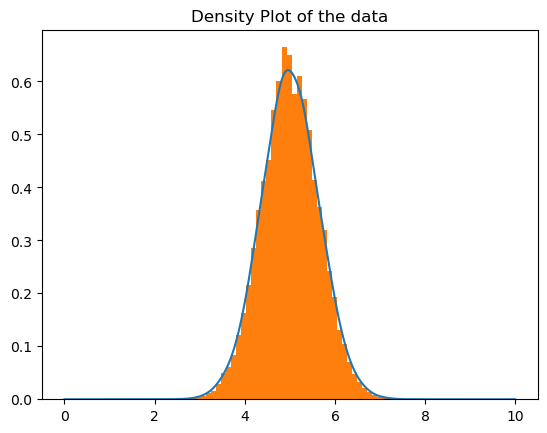

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
prob_density = kde.gaussian_kde(steps_list)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()
x = np.linspace(0, 10, 100000)
y=prob_density(x)
plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list, bins=50, density=True)
plt.show()

**$P(x)$ at 300K**

Number of energies: 99000
Number of accept: 38483, Number of rejects: 61517


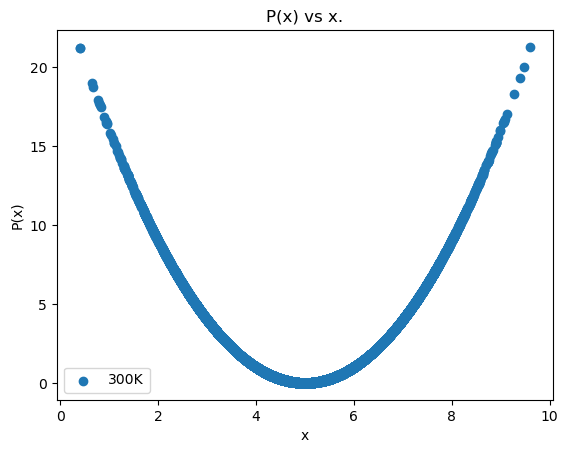

In [54]:
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
T = 300
k = 1
def V1(x):
    " Defining equation for boltzmann distribution"
    return (x - 5) ** 2 

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list1 =[] # creating a list for all the steps partook
eng_list1 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0

# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins
  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    x = math.exp( -(dE) / (kB*T) )
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list1.append(new_energy) 
    steps_list1.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list1.append(old_energy)
    steps_list1.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 300
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list1 = steps_list1[1000:] # remove of first 10% of steps
eng_list1 = eng_list1[1000:] # remove of first 10% of energies
print(f"Number of energies: {len(eng_list)}") # proof that first 10% of the numbers were discarded
print(f"Number of accept: {naccept}, Number of rejects: {nreject}")

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list1,eng_list1,label='300K')

plt.legend()

Probability Density at 300K

C:\Users\le.chen\AppData\Local\Temp\ipykernel_3588\176856702.py:4: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  prob_density = kde.gaussian_kde(steps_list1)


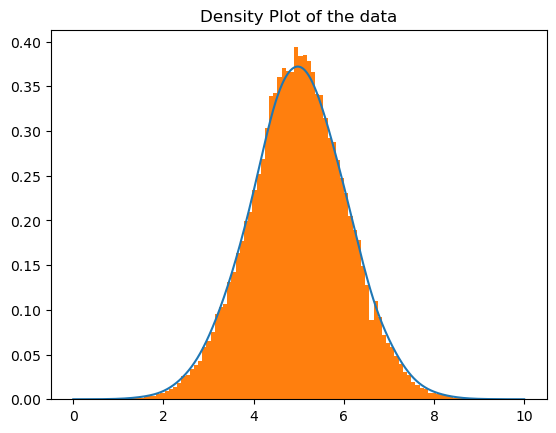

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
prob_density = kde.gaussian_kde(steps_list1)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()
x = np.linspace(0, 10, 100000)
y=prob_density(x)
plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list1, bins=100, density=True)
plt.show()

**$P(x)$ at 1000K**

Number of energies: 99000
Number of accept: 66197, Number of rejects: 33803


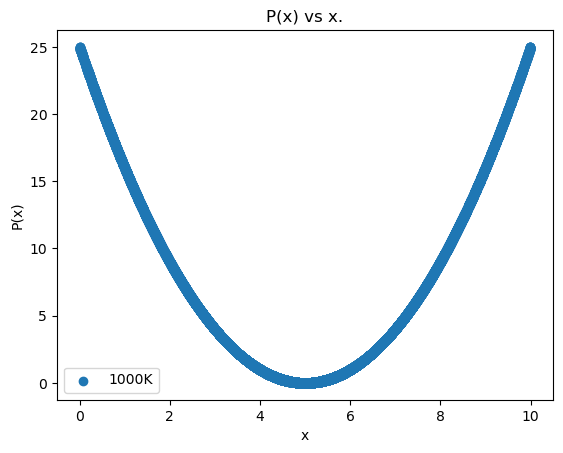

In [56]:
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R constant
T = 1000 #Temp
k = 1
def V1(x):
    " Defining equation for boltzmann distribution"
    return (x - 5) ** 2

old_num = random.uniform(0, 10) # picking a random number between 0 to 10
steps_list2 = [] # creating a list for all the steps partook
eng_list2 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject = 0
naccept = 0

# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins

  new_energy = V1(num) # calculate the new energy
  old_energy = V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0, 1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list2.append(new_energy) 
    steps_list2.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list2.append(old_energy)
    steps_list2.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 1000
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list2 = steps_list2[1000:] # remove of first 10% of steps
eng_list2 = eng_list2[1000:] # remove of first 10% of energies
print(f"Number of energies: {len(eng_list)}") # proof that first 10% of the numbers were discarded
print(f"Number of accept: {naccept}, Number of rejects: {nreject}")

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")

plt.scatter(steps_list2, eng_list2, label='1000K')

plt.legend()

**Probability Density at 1000K**

C:\Users\le.chen\AppData\Local\Temp\ipykernel_3588\2949150734.py:6: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  prob_density = kde.gaussian_kde(steps_list2)


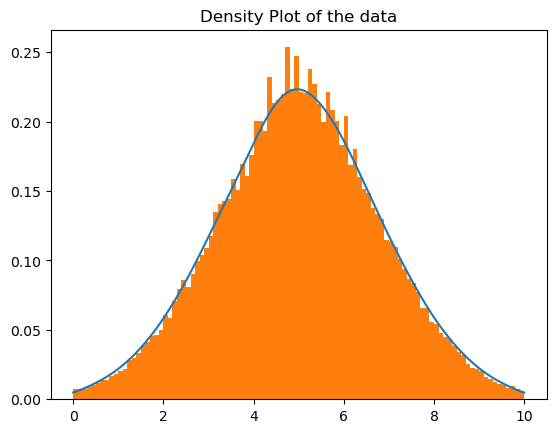

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

prob_density = kde.gaussian_kde(steps_list2)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(0, 10, 10000)
y = prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list2, bins=100, density = True)
plt.show()

Compute $\langle x \rangle$. Run the monte carlo again if this doesn't work.

<function matplotlib.pyplot.show(close=None, block=None)>

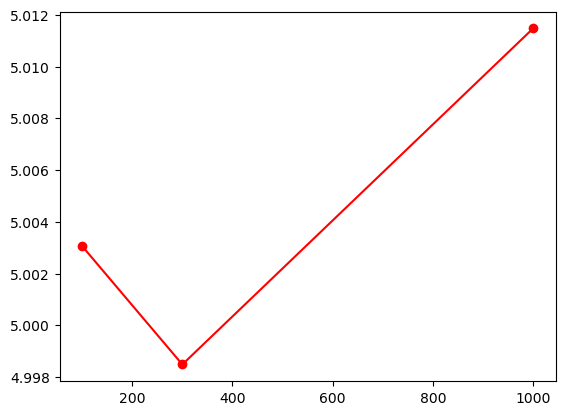

In [57]:
average = []

def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           
    
    avg = sum_num / len(num)
    return avg
for i in [steps_list, steps_list1, steps_list2]:
    average.append(cal_average(i))
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

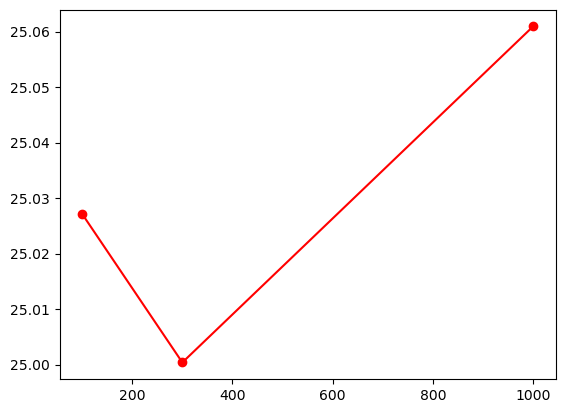

In [43]:
average1 = []
def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg ** 2
for i in [steps_list,steps_list1,steps_list2]:
  average1.append(cal_average(i))
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

Compute $\langle V_1 \rangle$

0.671830894053244 / 1.616143598878054
3.4903561743515232 / 2.799221668508348
18.88836102612844 / 5.038157674620045


<function matplotlib.pyplot.show(close=None, block=None)>

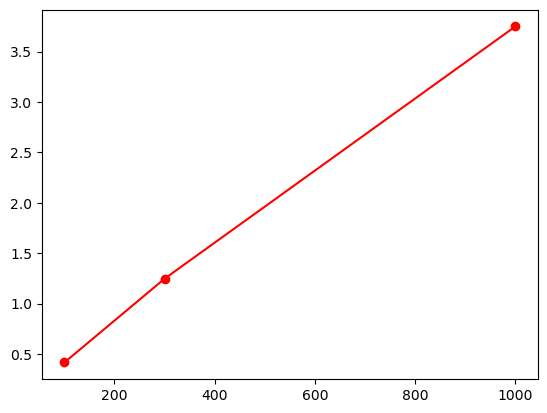

In [42]:
#2d , <V1>
V1=[]
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp((-k * (x - 5) ** 2) / kB / n)
  g = lambda x: (x - 5) ** 2 * exp((-k**2 * (x - 5) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show